<a href="https://colab.research.google.com/github/LeticiaHeeren/DIO-transfer-learning/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define a URL do dataset
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

# Baixar e descompactar o dataset
dataset = tf.keras.utils.get_file('flower_photos.tgz', url, untar=True, cache_dir='.')

# Defina o caminho do diretório
dataset_dir = dataset.rsplit('/', 1)[0]

# Carregar as imagens com a função image_dataset_from_directory
image_size = (180, 180)  # Redimensionar todas as imagens
batch_size = 32

train_dataset = image_dataset_from_directory(
    dataset_dir + '/flower_photos',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    dataset_dir + '/flower_photos',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [3]:
# Normalização das imagens (valor de cada pixel entre 0 e 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Aplicando a normalização no dataset
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))


In [13]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               weights='imagenet',
                                               include_top=False)

base_model.trainable = False  # Congelar as camadas do modelo pré-treinado

# Adicionar camadas de treinamento customizadas
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes de flores
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=10)  # Número de épocas ajustável

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 252ms/step - accuracy: 0.6890 - loss: 0.8155 - val_accuracy: 0.8365 - val_loss: 0.4431
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.8915 - loss: 0.2930 - val_accuracy: 0.8665 - val_loss: 0.3674
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9199 - loss: 0.2143 - val_accuracy: 0.8624 - val_loss: 0.3728
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9571 - loss: 0.1364 - val_accuracy: 0.8774 - val_loss: 0.3697
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9738 - loss: 0.0962 - val_accuracy: 0.8815 - val_loss: 0.3777
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9879 - loss: 0.0603 - val_accuracy: 0.8883 - val_loss: 0.3879
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9922 - loss: 0.0449 - val_accuracy: 0.8992 - val_loss: 0.3859
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9974 - loss: 0.0243 - val_accuracy: 0.89

In [7]:
# ... (código anterior) ...

# Certifique-se de que model.compile() é chamado antes de model.evaluate()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Accuracy on the validation dataset: {test_acc * 100:.2f}%")

# ... (restante do código) ...

23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.8857 - loss: 0.4228
Accuracy on the validation dataset: 89.65%


In [8]:
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Accuracy on the validation dataset: {test_acc * 100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8934 - loss: 0.3987
Accuracy on the validation dataset: 89.65%


In [9]:
base_model.trainable = True
# Congelar as camadas do modelo pré-treinado a partir da camada específica
fine_tune_at = 100  # Número de camadas a descongelar

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continuar o treinamento
history_fine = model.fit(train_dataset,
                         validation_data=validation_dataset,
                         epochs=10)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 203ms/step - accuracy: 0.8695 - loss: 0.3692 - val_accuracy: 0.8215 - val_loss: 0.8638
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9766 - loss: 0.0706 - val_accuracy: 0.8774 - val_loss: 0.5924
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.8760 - val_loss: 0.5579
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.8978 - val_loss: 0.4833
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9970 - loss: 0.0136 - val_accuracy: 0.9046 - val_loss: 0.4210
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9983 - loss: 0.0084 - val_accuracy: 0.8883 - val_loss: 0.4562
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9980 - loss: 0.0080 - val_accuracy: 0.8992 - val_loss: 0.4623
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9969 - loss: 0.0079 - val_accuracy: 0.904

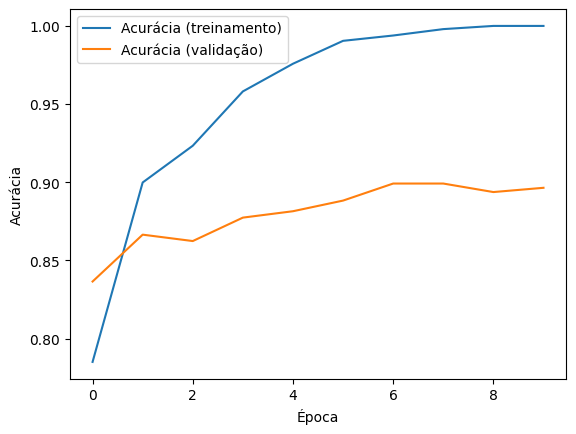

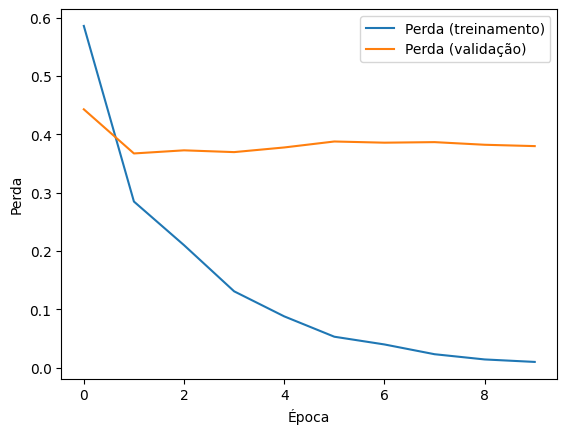

In [10]:
import matplotlib.pyplot as plt

# Visualizando as métricas de treinamento
plt.plot(history.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Visualizando a perda de treinamento
plt.plot(history.history['loss'], label='Perda (treinamento)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()
